<a href="https://colab.research.google.com/github/kancingkuning/data_analytics_with_python/blob/main/data_wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import numpy as np

In [149]:
import pandas as pd

In [150]:
import scipy as sp

In [151]:
from scipy import stats

# Measuring Central Tendency

mean
*   tidak toleran terhadap outlier
*   tidak cocok untuk data diskrit (example: jumlah kucing)

median
*   sangat toleran terhadap outlier
*   perlu juga memperhatikan nila data pada persentil ke-25 (Q1) dan persentil ke-75 (Q3), tidak hanya yang ke-50 saja.

mode
* nilai yang paling sering muncul



In [152]:
jumlah_kucing = np.array([3,2,1,1,2,3,2,1,0,2])
np.median(jumlah_kucing)

2.0

In [153]:
mode = stats.mode(jumlah_kucing)
print(mode)

ModeResult(mode=2, count=4)


# Measuring Dispersion

range
* perbedaan nilai maximum dan minimum
* selisih

interquartile range
* selisih antara Q3 dan Q1

variance
* besar simpangan suatu titik data dari nilai mean

standar deviation
* menghitung akar kuadrat dari variance
*  Semakin kecil nilai standard deviation, semakin kecil pula jarak antar titik data dengan nilai mean-nya sehingga bisa disimpulkan data tersebut memiliki sebaran yang sempit
* sering digunakan untuk menilai seberapa baik parameter mean dalam merepresentasikan suatu data.

In [154]:
IQR = np.percentile(jumlah_kucing, 75) - np.percentile(jumlah_kucing, 25)
print(IQR)

1.0


In [155]:
jumlah_kucing_series = pd.Series(jumlah_kucing)
jumlah_kucing_series.var()

0.8999999999999999

In [156]:
jumlah_kucing_series.std()

0.9486832980505138

# Data Distribution

symmetric distribution (normal/bell curve)
* memungkinkan kita untuk membagi data menjadi dua bagian secara simetris
* memiliki nilai mean, median, serta mode yang sama dan berada di sentral distribusi data

right-skewed distribution (lebih besar di kiri)
* nilai mean > nilai median & mode

left-skewed distribution (lebih besar di kanan)
* median, mode > mean

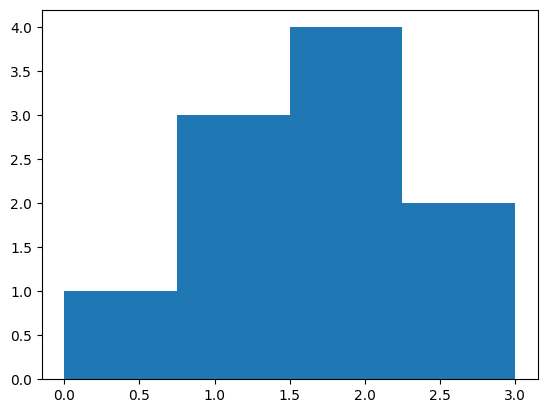

In [157]:
import matplotlib.pyplot as plt
plt.hist(jumlah_kucing, bins=4)
plt.show()

# Measuring Asymmetric

skewness
* nilai + distribusi cenderung right-skewed
* nol menggambarkan data yang memiliki distribusi simetris sempurna
* nilai skewness negatif merepresentasikan data dengan distribusi yang cenderung left-skewed.


In [158]:
jumlah_kucing_series.skew()

-0.2342427896421018

# Data Relationship

Data numerik
1. Correlation
    * rentang -1 hingga 1
    * nilai negatif = korelasi berlawanan
    * nilai positif = positive correlation
    * nilai 0 = no correlation

2. Covariance
    * + covar = dua feature bersesuaian
    * - covar = dua feature berlawanan
    * zero covar = tidak berkorelasi satu sama lain


In [159]:
sample_data = {
    'name': ['John', 'Alia', 'Ananya', 'Steve', 'Ben'],
    'age': [24, 22, 23, 25, 28],
    'communication_skill_score': [85, 70, 75, 90, 90],
    'quantitative_skill_score': [80, 90, 80, 75, 70]
}

df = pd.DataFrame(sample_data)

df.corr(numeric_only=True)

,age,communication_skill_score,quantitative_skill_score
age,1.000000,0.848855,-0.922489
communication_skill_score,0.848855,1.000000,-0.890724
quantitative_skill_score,-0.922489,-0.890724,1.000000


In [160]:
df.cov(numeric_only=True)

,age,communication_skill_score,quantitative_skill_score
age,5.30,17.75,-15.75
communication_skill_score,17.75,82.50,-60.00
quantitative_skill_score,-15.75,-60.00,55.00


# Data Wrangling

1. Data source
    * kaggle
    * UCI Maching Learning
    * Google dataset search
    * Satu Data Indonesia

In [161]:
# df = pd.read_csv("data.csv", delimiter=",")
# df = pd.read_excel("data.xlsx", sheet_name="Sheet1")
# df = pd.read_json("data.json")
# url = "https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list"
# df = pd.read_html(url)[0]
# df = pd.read_xml("https://www.w3schools.com/xml/books.xml")

In [162]:
df = pd.read_xml("https://www.w3schools.com/xml/books.xml")
print(df)

   category              title                  author  year  price      cover
0   cooking   Everyday Italian     Giada De Laurentiis  2005  30.00       None
1  children       Harry Potter            J K. Rowling  2005  29.99       None
2       web  XQuery Kick Start  Vaidyanathan Nagarajan  2003  49.99       None
3       web       Learning XML             Erik T. Ray  2003  39.95  paperback


In [163]:
#library pendukung untuk mengakses database
#SQLAlchemy
import sqlalchemy as sqla

fungsi #1 untuk berinteraksi dengan database

In [164]:
#db = sqla.create_engine("sqlite://mydata.sqlite")
#pd.read_sql_table("table_name", db)

fungsi #2 untuk berinteraksi dengan database

In [165]:
#pd.read_sql_query("SELECT * FROM table_name", db)

fungsi #3 untuk berinteraksi dengan database

In [166]:
#pd.read_sql("SELECT * FROM table_name", db)

Primary key merupakan sebuah kolom dengan nilai unik yang merepresentasikan suatu data dalam sebuah tabel.

Foreign key merupakan kolom yang berisi primary key dari tabel lain. Ia digunakan untuk mereferensikan data dari tabel lain hingga terbentuk sebuah relationship antar tabel.

Jenis join:
- Inner = hanya nilai yang sesuai di kedua tabel
- Left = mengambil semua nilai dari tabel  kiri berserta nilai yang sesuai dengan tabel kanan
- Right = mengambil semua nilai dari tabel kanan beserta nilai yang bersesuaian dari tabel kiri
- Outer = full outer join, mengambil semua nilai, gabungan left dan right join


#fungsi pandas untuk menggabungkan data = merge

product_df = pd.read_csv("product.csv")
orders_df = pd.read_csv("orders.csv")

new_order_df = pd.merge(
    left=product_df,
    right=orders_df,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)

masalah umum yang dijumpai dalam menganalisa data (data wrangling):

* missing value
#product_df.isnull().sum()
* invalid value
#dapat diatasi dengan filtering menggunakan regex
* duplicate data
#df.duplicated().sum()
*innaccurate value
*inconsistent value
*outlier
#IQR Method, membuat nilai cut-off sebagai faktor k (nilai 1.5-3), nilai ini akan diggunakan untuk menghitung ambang batas, minimum dan maksimum. di luar angka yang telah dihitung, ditentukan sbg outlier.

#selain IQR, dapat menggunakan box plot, lebih mudah untuk mengidentifikasi outlier melalui visual

import numpy as np

q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in data if x < minimum or x > maximum]

# Proses cleaning data

1. define
2. code
3. test

teknik untuk mengatasi missing value:
* dropping
products_df.dropna(axis=0, inplace=True)
* imputation
   - data kontinu, kita bisa menggunakan nilai mean, median, atau mode sebagai pengganti missing value.
   - data kategoris, kita dapat mengisi missing value dengan kategori yang paling sering muncul
   - data.age.fillna(value=data.age.mean(), inplace=True)
   - belum terlalu baik untuk data time series

* interpolation
    - menghitung titik data baru berdasarkan range data yang ada, menggunakan persamaan garis linear/polynominal
    - cocok untuk time series
    - data.close_price.interpolate(method='linear', limit_direction='forward', inplace=True)

# Teknik untuk mengatasi outlier
1. drop

df = pd.read_csv("data.csv")

Q1 = (df['TotalCharges']).quantile(0.25)
Q3 = (df['TotalCharges']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = df['TotalCharges'] < minimum
kondisi_more_than = df['TotalCharges'] > maximum

df.drop(df[kondisi_lower_than].index, inplace=True)
df.drop(df[kondisi_more_than].index, inplace=True)

2. imputation

selain mengisi data dengan central tendency, bisa menggunakan boundary value.

Q1 = (df['TotalCharges']).quantile(0.25)
Q3 = (df['TotalCharges']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = df['TotalCharges'] < minimum
kondisi_more_than = df['TotalCharges'] > maximum

df.mask(cond=kondisi_more_than, maximum, axis=1, inplace=True)
df.mask(cond=kondisi_lower_than, minimum, axis=1, inplace=True)


# Teknik untuk mengatasi data duplicate

df.drop_duplicates(inplace=True)



---



---



In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/DicodingCollection/customers.csv")
customers_df.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


In [169]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/DicodingCollection/orders.csv")
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


In [170]:
products_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/DicodingCollection/products.csv")
products_df.head()

,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


In [171]:
sales_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/DicodingCollection/sales.csv")
sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0
3,3,1,1002,106,2,212.0
4,4,1,691,113,3,339.0


In [172]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB


In [173]:
customers_df.isna().sum()

,0
customer_id,0
customer_name,0
gender,18
age,0
home_address,0
zip_code,0
city,0
state,0
country,0


In [174]:
print("duplicate_data: ", customers_df.duplicated().sum())

duplicate_data:  6


In [175]:
customers_df.describe()

,customer_id,age,zip_code
count,1007.000000,1007.000000,1007.000000
mean,501.726912,50.929494,5012.538232
std,288.673238,30.516299,2885.836112
min,1.000000,20.000000,2.000000
25%,252.500000,34.000000,2403.500000
50%,502.000000,50.000000,5087.000000
75%,751.500000,65.000000,7493.500000
max,1000.000000,700.000000,9998.000000


In [176]:
orders_df.info()
orders_df.isna().sum()
print("duplicate_data: ", orders_df.duplicated().sum())
orders_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB
duplicate_data:  0


,order_id,customer_id,payment
count,1000.000000,1000.000000,1000.000000
mean,500.500000,506.640000,33972.936000
std,288.819436,277.115502,14451.609047
min,1.000000,1.000000,10043.000000
25%,250.750000,275.250000,21329.250000
50%,500.500000,515.000000,33697.500000
75%,750.250000,737.250000,46249.000000
max,1000.000000,1000.000000,59910.000000


In [177]:
products_df.info()
products_df.isna().sum()
print("duplicate_data: ", products_df.duplicated().sum())
products_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.2+ KB
duplicate_data:  6


,product_id,price,quantity
count,1266.000000,1266.000000,1266.000000
mean,627.926540,105.812006,60.138231
std,363.971586,9.715611,11.682791
min,0.000000,90.000000,40.000000
25%,313.250000,95.250000,50.000000
50%,626.500000,109.000000,60.000000
75%,942.750000,114.000000,70.000000
max,1259.000000,119.000000,80.000000


In [178]:
sales_df.info()
sales_df.isna().sum()
print("duplicate_data: ", sales_df.duplicated().sum())
sales_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB
duplicate_data:  0


,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4981.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.307368
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.352449
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


In [179]:
sales_df.isna().sum()

,0
sales_id,0
order_id,0
product_id,0
price_per_unit,0
quantity,0
total_price,19


In [180]:
#membersihkan data duplicate dengan drop
customers_df.drop_duplicates(inplace=True)

In [181]:
print("duplicate_data: ", customers_df.duplicated().sum())

duplicate_data:  0


In [182]:
customers_df[customers_df.gender.isna()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
38,39,fulan 39,NaN,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
167,168,fulan 168,NaN,27,2781 Berge MallSuite 452,1975,North Leoburgh,Western Australia,Australia
322,322,fulan 322,NaN,30,593 Becker CircleApt. 333,1640,Jacobiview,Western Australia,Australia
393,393,fulan 393,NaN,34,5158 Levi HillSuite 531,1474,Johnsburgh,Queensland,Australia
442,442,fulan 442,NaN,26,5157 Feil RoadApt. 633,7249,Port Chloe,New South Wales,Australia
722,720,fulan 720,NaN,40,31 Jordan ParadeApt. 400,1380,West Henry,South Australia,Australia
745,743,fulan 743,NaN,57,09 Christopher StreetSuite 967,6226,Lake Lukemouth,Western Australia,Australia
773,771,fulan 771,NaN,74,7367 Wright JunctionApt. 773,8882,Kuhntown,Victoria,Australia
798,795,fulan 795,NaN,49,487 Summer MewsApt. 874,1712,East Hayden,Australian Capital Territory,Australia
801,798,fulan 798,NaN,56,27 Aiden KnollApt. 875,6531,Port Sam,Australian Capital Territory,Australia


In [183]:
customers_df.gender.value_counts()

,count
gender,
Prefer not to say,725
Male,143
Female,115


In [184]:
customers_df.fillna(value="Prefer not to say", inplace=True)

In [185]:
customers_df.isna().sum()

,0
customer_id,0
customer_name,0
gender,0
age,0
home_address,0
zip_code,0
city,0
state,0
country,0


In [186]:
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
967,961,fulan 961,Prefer not to say,700,29 Farrell ParadeSuite 818,6528,New Joseph,South Australia,Australia


In [187]:
customers_df.age.replace(customers_df.age.max(), 70, inplace=True)

<ipython-input-187-b0aaf8dd8060>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers_df.age.replace(customers_df.age.max(), 70, inplace=True)


In [188]:
customers_df.age.replace(customers_df.age.max(), 50, inplace=True)

<ipython-input-188-098432afa05d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers_df.age.replace(customers_df.age.max(), 50, inplace=True)


In [189]:
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
34,35,fulan 35,Male,80,3168 Bartoletti CrescentSuite 878,593,Port Lucas,Queensland,Australia
38,39,fulan 39,Prefer not to say,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
142,143,fulan 143,Prefer not to say,80,87 Hahn Station StSuite 943,8254,New Ella,Victoria,Australia
154,155,fulan 155,Male,80,85 Charles MallSuite 424,7841,Port Sophia,New South Wales,Australia
170,171,fulan 171,Prefer not to say,80,16 Boyer WaySuite 018,6226,South Gabriel,Western Australia,Australia
174,175,fulan 175,Prefer not to say,80,57 David MallSuite 596,3129,Haneton,South Australia,Australia
181,182,fulan 182,Male,80,32 Thomas CrestSuite 753,2147,Archiefurt,Queensland,Australia
235,236,fulan 236,Prefer not to say,80,64 Phillips RunApt. 722,2752,East Sienna,New South Wales,Australia
424,424,fulan 424,Prefer not to say,80,03 Grant CrestSuite 228,5743,Lake Charliemouth,Western Australia,Australia
438,438,fulan 438,Prefer not to say,80,569 Alyssa IslandApt. 766,6893,Hunterland,Western Australia,Australia


In [190]:
customers_df.describe()

,customer_id,age,zip_code
count,1001.000000,1001.000000,1001.000000
mean,500.942058,49.874126,5000.693307
std,289.013599,17.644663,2886.084454
min,1.000000,20.000000,2.000000
25%,251.000000,34.000000,2398.000000
50%,501.000000,50.000000,5079.000000
75%,751.000000,65.000000,7454.000000
max,1000.000000,80.000000,9998.000000


In [191]:
datetime_columns = ["order_date", "delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [192]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


In [193]:
products_df.drop_duplicates(inplace=True)

In [194]:
print("jumlah duplikat:", products_df.duplicated().sum())

jumlah duplikat: 0


In [195]:
sales_df[sales_df.total_price.isna()]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
9,9,2,1196,105,1,NaN
121,121,27,1027,90,3,NaN
278,278,63,360,94,2,NaN
421,421,95,1091,115,1,NaN
489,489,108,1193,105,3,NaN
539,539,117,405,119,2,NaN
636,636,134,653,93,3,NaN
687,687,145,1138,102,1,NaN
854,854,177,64,104,1,NaN
1079,1079,222,908,94,3,NaN


In [196]:
sales_df["total_price"] = sales_df["price_per_unit"] * sales_df["quantity"]

In [197]:
sales_df.isna().sum()

,0
sales_id,0
order_id,0
product_id,0
price_per_unit,0
quantity,0
total_price,0


 # explanatory analysis merupakan proses penyampaian temuan menarik dari proses exploratory analysis. Proses penyampaian ini tentunya harus diikuti dengan visualisasi data yang baik dan efektif

# Mendefinisikan pertanyaan untuk explorasi data
- problem solving:
  membuat prediksi
  mengkategorikan beberapa hal
  menemukan sesuatu yang tidak biasa
  identifikasi tema
  menemukan hubungan
  menemukan pola

data = building block

cara mendefinisikan pertanyaan

1.   spesific
2.   measurable
3.   action-oriented
4.   relevant
5.   time-bound



In [198]:
import pandas as pd

city_names = ['Jakarta', 'Bandung', 'Makassar', 'Surabaya', 'Medan', 'Yogyakarta', 'Malang']
population = [498044, 964254, 491918, 8398748, 653115, 883305, 744955]
num_airports = [2, 2, 8, 3, 1, 3, 2]

df = pd.DataFrame({
  'City Name': city_names,
  'Population': population,
  'Airports': num_airports,
})

df.describe()

,Population,Airports
count,7.000000e+00,7.000000
mean,1.804906e+06,3.000000
std,2.913095e+06,2.309401
min,4.919180e+05,1.000000
25%,5.755795e+05,2.000000
50%,7.449550e+05,2.000000
75%,9.237795e+05,3.000000
max,8.398748e+06,8.000000


In [199]:
df.describe(include="all")

,City Name,Population,Airports
count,7,7.000000e+00,7.000000
unique,7,NaN,NaN
top,Jakarta,NaN,NaN
freq,1,NaN,NaN
mean,NaN,1.804906e+06,3.000000
std,NaN,2.913095e+06,2.309401
min,NaN,4.919180e+05,1.000000
25%,NaN,5.755795e+05,2.000000
50%,NaN,7.449550e+05,2.000000
75%,NaN,9.237795e+05,3.000000


array([[<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Airports'}>]], dtype=object)

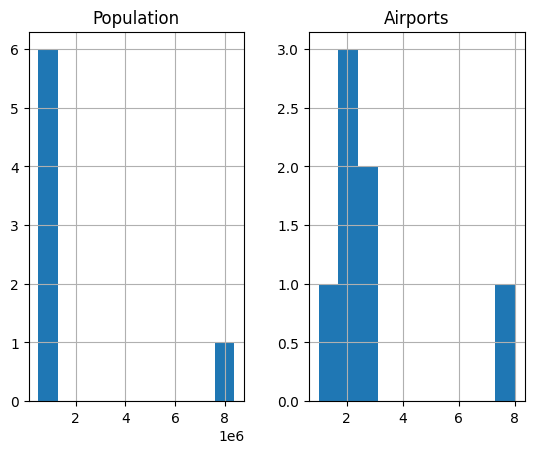

In [200]:
df.hist()

In [201]:
# Exclude the 'City Name' column and calculate the correlation matrix
correlation_matrix = df[['Population', 'Airports']].corr()
print(correlation_matrix)


            Population  Airports
Population    1.000000 -0.026109
Airports     -0.026109  1.000000


In [202]:
body_measurement_df = pd.DataFrame.from_records((
  (2, 83.82, 8.4),
  (4, 99.31, 16.97),
  (3, 96.52, 14.41),
  (6, 114.3, 20.14),
  (4, 101.6, 16.91),
  (2, 86.36, 12.64),
  (3, 92.71, 14.23),
  (2, 85.09, 11.11),
  (2, 85.85, 14.18),
  (5, 106.68, 20.01),
  (4, 99.06, 13.17),
  (5, 109.22, 15.36),
  (4, 100.84, 14.78),
  (6, 115.06, 20.06),
  (2, 84.07, 10.02),
  (7, 121.67, 28.4),
  (3, 94.49, 14.05),
  (6, 116.59, 17.55),
  (7, 121.92, 22.96),
), columns=("age", "height_cm", "weight_kg"))

body_measurement_df.groupby(by="age").mean()

,height_cm,weight_kg
age,,
2,85.038000,11.2700
3,94.573333,14.2300
4,100.202500,15.4575
5,107.950000,17.6850
6,115.316667,19.2500
7,121.795000,25.6800


In [203]:
body_measurement_df.groupby(by='age').agg({
    'height_cm': 'mean',
    'weight_kg': ['mean','max', 'min'],
})

height_cm weight_kg              
           mean      mean    max    min
age                                    
2     85.038000   11.2700  14.18   8.40
3     94.573333   14.2300  14.41  14.05
4    100.202500   15.4575  16.97  13.17
5    107.950000   17.6850  20.01  15.36
6    115.316667   19.2500  20.14  17.55
7    121.795000   25.6800  28.40  22.96

Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
Produk apa yang paling banyak dan paling sedikit terjual?
Bagaimana demografi pelanggan yang kita miliki?
Kapan terakhir pelanggan melakukan transaksi?
Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

In [204]:
customers_df.describe(include="all")

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
count,1001.000000,1001,1001,1001.000000,1001,1001.000000,1001,1001,1001
unique,NaN,1000,3,NaN,1000,NaN,961,8,1
top,NaN,fulan 943,Prefer not to say,NaN,3117 Heller PlaceSuite 149,NaN,New Ava,South Australia,Australia
freq,NaN,2,743,NaN,2,NaN,3,140,1001
mean,500.942058,NaN,NaN,49.874126,NaN,5000.693307,NaN,NaN,NaN
std,289.013599,NaN,NaN,17.644663,NaN,2886.084454,NaN,NaN,NaN
min,1.000000,NaN,NaN,20.000000,NaN,2.000000,NaN,NaN,NaN
25%,251.000000,NaN,NaN,34.000000,NaN,2398.000000,NaN,NaN,NaN
50%,501.000000,NaN,NaN,50.000000,NaN,5079.000000,NaN,NaN,NaN
75%,751.000000,NaN,NaN,65.000000,NaN,7454.000000,NaN,NaN,NaN


In [205]:
customers_df.groupby(by='gender').agg({
    "customer_id": "nunique",
    "age": ["max", "min", "mean", "std"]
})

customer_id age                          
                      nunique max min       mean        std
gender                                                     
Female                    115  79  20  49.147826  16.646607
Male                      143  80  20  51.230769  18.462635
Prefer not to say         742  80  20  49.725437  17.644283

In [206]:
customers_df.groupby(by="city").customer_id.nunique().sort_values(ascending=False)


,customer_id
city,
East Aidan,3
East Sophia,3
New Ava,3
West Jackfort,2
Corkeryshire,2
...,...
Jordanside,1
Josephland,1
Josephmouth,1


In [207]:
customers_df.groupby(by="state").customer_id.nunique().sort_values(ascending=False)

,customer_id
state,
South Australia,139
Queensland,134
New South Wales,132
Northern Territory,125
Western Australia,124
Australian Capital Territory,121
Victoria,121
Tasmania,104


In [208]:
delivery_time = orders_df["delivery_date"] - orders_df["order_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)
print(orders_df)

     order_id  customer_id  payment order_date delivery_date  delivery_time
0           1           64    30811 2021-08-30    2021-09-24           25.0
1           2          473    50490 2021-02-03    2021-02-13           10.0
2           3          774    46763 2021-10-08    2021-11-03           26.0
3           4          433    39782 2021-05-06    2021-05-19           13.0
4           5          441    14719 2021-03-23    2021-03-24            1.0
..        ...          ...      ...        ...           ...            ...
995       996          345    37843 2021-01-13    2021-02-02           20.0
996       997          346    53831 2021-01-18    2021-01-31           13.0
997       998          407    53308 2021-05-05    2021-05-21           16.0
998       999          428    31643 2021-06-15    2021-07-12           27.0
999      1000          896    27836 2021-04-07    2021-04-24           17.0

[1000 rows x 6 columns]


In [209]:
orders_df.describe(include="all")

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
count,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000
mean,500.500000,506.640000,33972.936000,2021-05-27 18:38:52.800000,2021-06-10 20:31:12,14.078000
min,1.000000,1.000000,10043.000000,2021-01-01 00:00:00,2021-01-03 00:00:00,1.000000
25%,250.750000,275.250000,21329.250000,2021-03-13 18:00:00,2021-03-28 00:00:00,8.000000
50%,500.500000,515.000000,33697.500000,2021-05-27 12:00:00,2021-06-11 12:00:00,14.000000
75%,750.250000,737.250000,46249.000000,2021-08-12 06:00:00,2021-08-24 06:00:00,21.000000
max,1000.000000,1000.000000,59910.000000,2021-10-24 00:00:00,2021-11-20 00:00:00,27.000000
std,288.819436,277.115502,14451.609047,NaN,NaN,7.707225


In [210]:
customer_id_in_order_df = orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_order_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
175,176,fulan 176,Male,45,4036 Thompson StreetApt. 565,2548,Lake Johnchester,New South Wales,Australia,Active
159,160,fulan 160,Male,26,70 Phoenix DriveApt. 109,3950,Hicklebury,New South Wales,Australia,Active
146,147,fulan 147,Male,42,307 Declan Estate DrSuite 265,9361,Walkerhaven,Western Australia,Australia,Non Active
96,97,fulan 97,Female,39,6303 Nate BoulevardSuite 368,2815,North Ellabury,Northern Territory,Australia,Active
904,900,fulan 900,Prefer not to say,22,93 Amy GroveApt. 822,9455,East Emily,Tasmania,Australia,Active


In [211]:
customers_df.groupby(by="status").customer_id.count()

,customer_id
status,
Active,617
Non Active,384


In [212]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status
0,1,64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active
1,2,473,50490,2021-02-03,2021-02-13,10.0,fulan 473,Male,61,531 Schmitt BoulevardApt. 010,1744,Annaton,South Australia,Australia,Active
2,3,774,46763,2021-10-08,2021-11-03,26.0,fulan 774,Prefer not to say,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia,Active
3,4,433,39782,2021-05-06,2021-05-19,13.0,fulan 433,Prefer not to say,46,5777 Mayer PassApt. 881,9728,West Michaelport,Tasmania,Australia,Active
4,5,441,14719,2021-03-23,2021-03-24,1.0,fulan 441,Prefer not to say,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia,Active


In [213]:
orders_customers_df.groupby(by="city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,city,order_id
0,Jordanside,6
1,New Ava,6
2,Lake Rose,5
3,O'keefeton,5
4,East Max,5
5,Port Hannahburgh,5
6,Rubyfort,5
7,West Kai,5
8,Andrewborough,4
9,Port Aaronton,4


In [214]:
orders_customers_df.groupby(by="state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,state,order_id
0,South Australia,148
1,Queensland,139
2,Western Australia,130
3,New South Wales,129
4,Australian Capital Territory,118
5,Victoria,118
6,Tasmania,112
7,Northern Territory,106


In [215]:
orders_customers_df.groupby(by="gender").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,gender,order_id
0,Prefer not to say,725
1,Female,139
2,Male,136


In [216]:
orders_customers_df["age_group"] = orders_customers_df.age.apply(lambda x: "Youth" if x <= 24 else ("Seniors" if x > 64 else "Adults"))
orders_customers_df.groupby(by="age_group").order_id.nunique().sort_values(ascending=False)

,order_id
age_group,
Adults,681
Seniors,226
Youth,93


In [217]:
products_df.describe(include="all")

,product_id,product_type,product_name,size,colour,price,quantity,description
count,1260.000000,1260,1260,1260,1260,1260.000000,1260.000000,1260
unique,NaN,3,35,8,7,NaN,NaN,1260
top,NaN,Shirt,Denim,XS,red,NaN,NaN,"A red coloured, XS sized, Oxford Cloth Shirt"
freq,NaN,420,70,252,180,NaN,NaN,1
mean,629.500000,NaN,NaN,NaN,NaN,105.805556,60.150000,NaN
std,363.874979,NaN,NaN,NaN,NaN,9.704423,11.670573,NaN
min,0.000000,NaN,NaN,NaN,NaN,90.000000,40.000000,NaN
25%,314.750000,NaN,NaN,NaN,NaN,95.750000,50.000000,NaN
50%,629.500000,NaN,NaN,NaN,NaN,108.500000,60.000000,NaN
75%,944.250000,NaN,NaN,NaN,NaN,114.000000,70.000000,NaN


In [218]:
sales_df.describe(include="all")

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


In [219]:
products_df.sort_values(by="price", ascending=False)

,product_id,product_type,product_name,size,colour,price,quantity,description
704,698,Jacket,Parka,L,violet,119,53,"A violet coloured, L sized, Parka Jacket"
671,665,Jacket,Parka,XS,red,119,65,"A red coloured, XS sized, Parka Jacket"
698,692,Jacket,Parka,M,indigo,119,66,"A indigo coloured, M sized, Parka Jacket"
699,693,Jacket,Parka,L,indigo,119,44,"A indigo coloured, L sized, Parka Jacket"
700,694,Jacket,Parka,XL,indigo,119,78,"A indigo coloured, XL sized, Parka Jacket"
...,...,...,...,...,...,...,...,...
1225,1219,Trousers,Pleated,XL,indigo,90,45,"A indigo coloured, XL sized, Pleated Trousers"
1226,1220,Trousers,Pleated,XS,violet,90,58,"A violet coloured, XS sized, Pleated Trousers"
1227,1221,Trousers,Pleated,S,violet,90,50,"A violet coloured, S sized, Pleated Trousers"
1228,1222,Trousers,Pleated,M,violet,90,45,"A violet coloured, M sized, Pleated Trousers"


In [220]:
products_df.groupby(by="product_type").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min", "max"]
})

product_id quantity price     
                nunique      sum   min  max
product_type                               
Jacket              420    25387    90  119
Shirt               420    25263    92  119
Trousers            420    25139    90  119

In [221]:
products_df.groupby(by="product_name").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min", "max"]
})

product_id quantity price     
                     nunique      sum   min  max
product_name                                    
Bomber                    35     2083    90   90
Camp Collared             35     2071   112  112
Cardigan                  35     2032   118  118
Cargo Pants               35     2146   106  106
Casual Slim Fit           35     2086   113  113
Chambray                  35     2020   105  105
Chinos                    35     2101   100  100
Coach                     35     2158   115  115
Cords                     35     2260   113  113
Cropped                   35     2085    99   99
Cuban Collar              35     2017    93   93
Denim                     70     4204    92  115
Drawstring                35     2042   104  104
Dress                     35     2125   119  119
Flannel                   35     2135    96   96
Henley                    35     2051    92   92
High-Waisted              35     2198    98   98
Joggers                   35     2107    94   94
Leather                   35     2276   113  113
Linen                     35     2138   116  116
Mandarin Collar           35     2203   108  108
Oxford Cloth              35     2071   114  114
Parka                     35     2201   119  119
Peacoat                   35     2067   102  102
Pleated                   35     2030    90   90
Polo                      35     2196   117  117
Puffer                    35     1946   110  110
Pullover                  35     2184   114  114
Relaxed Leg               35     2002    95   95
Shearling                 35     2169    95   95
Slim-Fit                  35     2155   119  119
Tracksuit Bottoms         35     2038    91   91
Trench Coat               35     2132   112  112
Windbreaker               35     2085   109  109
Wool                      35     1975   111  111

In [222]:
sales_products_df = pd.merge(
    left=sales_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sales_products_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket"


In [223]:
sales_products_df.groupby(by="product_type").agg({
    "sales_id":"nunique",
    "quantity_x": "sum",
    "total_price": "sum"
})

,sales_id,quantity_x,total_price
product_type,,,
Jacket,1676,3343,357026
Shirt,1641,3259,333600
Trousers,1683,3360,341174


In [224]:
sales_products_df.groupby(by="product_name").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
}).sort_values(by="total_price", ascending=False)

,sales_id,quantity_x,total_price
product_name,,,
Denim,273,527,52399
Casual Slim Fit,154,306,36414
Trench Coat,146,299,35581
Shearling,150,302,35334
Puffer,140,298,35164
Flannel,141,281,33158
Cropped,135,284,32660
Pleated,147,308,32340
Joggers,164,334,31062


In [225]:
all_df = pd.merge(
    left=sales_products_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

all_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,...,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors


In [226]:
all_df.groupby(by=["state", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
state                        product_type                         
Australian Capital Territory Jacket               406        43204
                             Shirt                396        40448
                             Trousers             454        46790
New South Wales              Jacket               451        47998
                             Shirt                431        43980
                             Trousers             392        39766
Northern Territory           Jacket               365        38991
                             Shirt                336        33865
                             Trousers             384        38998
Queensland                   Jacket               499        53511
                             Shirt                417        42506
                             Trousers             453        46045
South Australia              Jacket               461        49090
                             Shirt                509        52685
                             Trousers             455        46041
Tasmania                     Jacket               412        44370
                             Shirt                387        39668
                             Trousers             379        38057
Victoria                     Jacket               359        38203
                             Shirt                390        40206
                             Trousers             414        41948
Western Australia            Jacket               390        41659
                             Shirt                393        40242
                             Trousers             429        43529

In [227]:
all_df.groupby(by=["gender", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
gender            product_type                         
Female            Jacket               481        50963
                  Shirt                445        45146
                  Trousers             481        49295
Male              Jacket               480        50978
                  Shirt                410        41939
                  Trousers             453        46071
Prefer not to say Jacket              2382       255085
                  Shirt               2404       246515
                  Trousers            2426       245808

In [228]:
all_df.groupby(by=["age_group", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
age_group product_type                         
Adults    Jacket              2292       245055
          Shirt               2225       227781
          Trousers            2272       231271
Seniors   Jacket               777        82959
          Shirt                733        74977
          Trousers             766        77471
Youth     Jacket               274        29012
          Shirt                301        30842
          Trousers             322        32432

# KOMPONEN VISUALISASI DATA
position
size
shape
color
texture
angle

**UNIVARIATE**






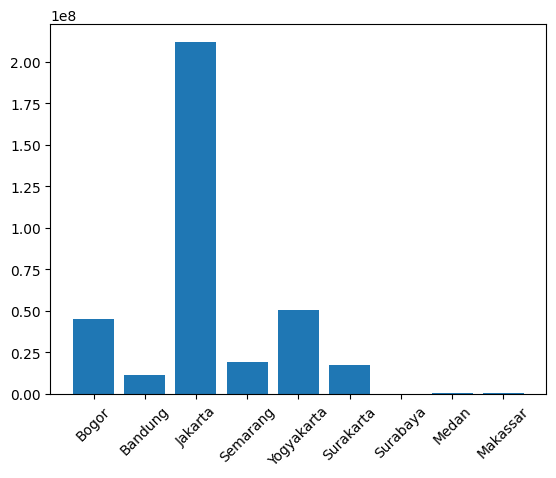

In [229]:
import matplotlib.pyplot as plt

cities = ('Bogor', 'Bandung', 'Jakarta', 'Semarang', 'Yogyakarta',
          'Surakarta','Surabaya', 'Medan', 'Makassar')

populations = (45076704, 11626410, 212162757, 19109629, 50819826, 17579085,
               3481, 287750, 785409)

plt.bar(x=cities, height=populations)
plt.xticks(rotation=45)
plt.show()

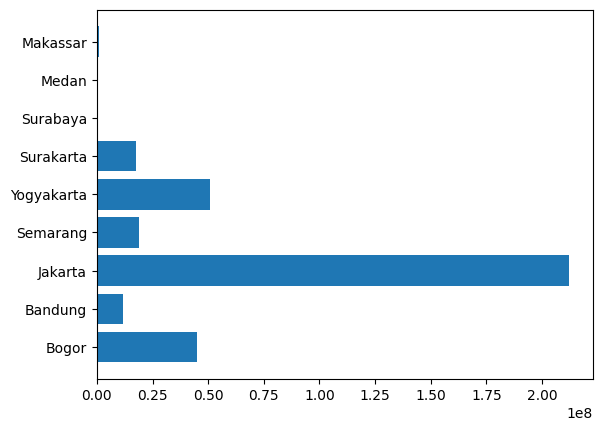

In [230]:
plt.barh(y=cities, width=populations)
plt.show()

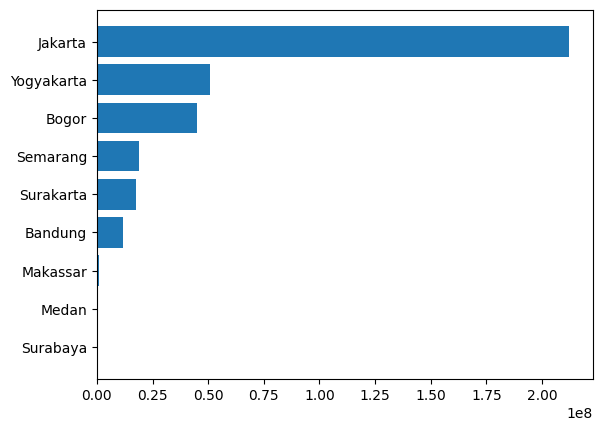

In [231]:
df = pd.DataFrame({
    'Cities': cities,
    'Population': populations,
})

df.sort_values(by='Population', inplace=True)

plt.barh(y=df["Cities"], width=df["Population"])
plt.show()

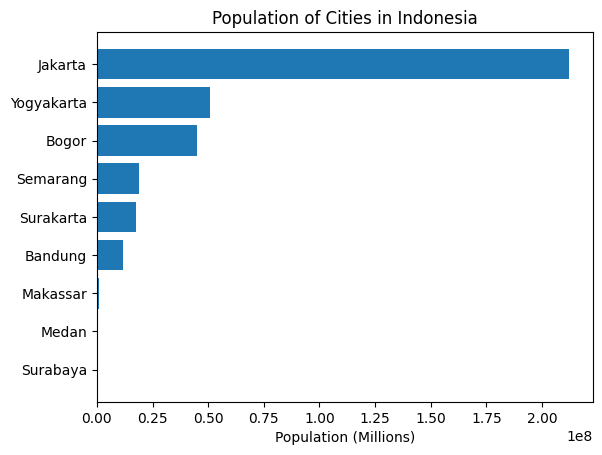

In [232]:
plt.barh(y=df["Cities"], width=df["Population"])
plt.xlabel("Population (Millions)")
plt.title("Population of Cities in Indonesia")
plt.show()

Untuk membuat bar chart menggunakan library seaborn, kita bisa menggunakan function barplot(). Function ini akan menyediakan beberapa parameter penting seperti berikut.

* data: menampung DataFrame yang akan digunakan.
* x, y: menampung nama kolom atau data yang divisualisasikan.
* orient: orientasi dari bar chart yang akan digunakan (“v” atau “h”).
* color: mendefinisikan warna yang akan digunakan.

In [233]:
import seaborn as sns

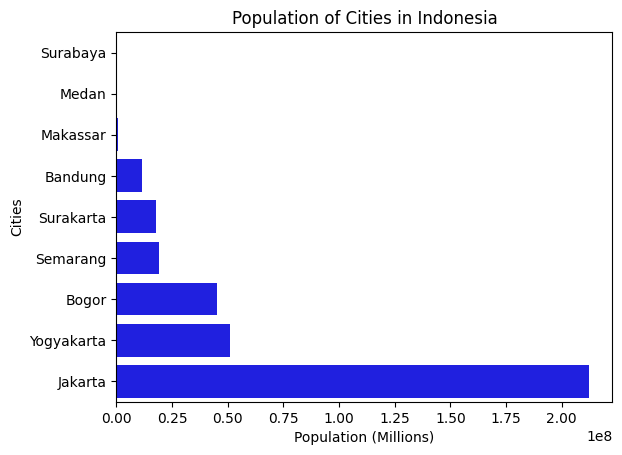

In [234]:
sns.barplot(y=df["Cities"], x=df["Population"], orient="h", color='blue')
plt.xlabel("Population (Millions)")
plt.title("Population of Cities in Indonesia")
plt.show()

Untuk membuat pie chart, kita bisa memanfaatkan library andalan, yaitu matplotlib. Ia telah menyediakan sebuah function bernama pie() untuk menghasilkan grafik pie chart. Function tersebut memiliki beberapa parameter penting yaitu seperti berikut.

* x: menampung data yang akan divisualisasikan.
* explode: menampung array atau list yang mengatur posisi tiap irisan lingkaran.
* labels: sekumpulan string yang digunakan untuk memberi label pada tiap irisan lingkaran.
* colors: sekumpulan warna yang akan digunakan pada tiap irisan lingkaran.
* autopct: string yang digunakan untuk memberi numerik label pada tiap irisan lingkaran.

In [235]:
import matplotlib.pyplot as plt

flavors = ('Chocolate', 'Vanilla', 'Macha', 'Others')
votes = (50, 20, 30, 10)
colors = ('#8B4513', '#FFF8DC', '#93C572', '#E67F0D')
explode = (0.1, 0, 0, 0)

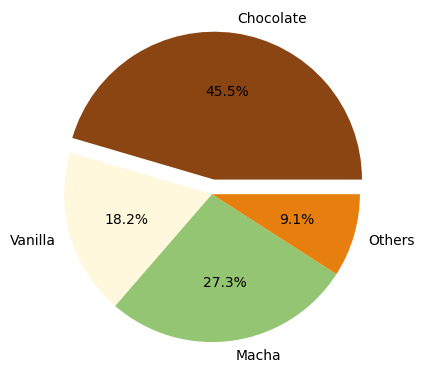

In [236]:
plt.pie(
    x=votes,
    labels=flavors,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)
plt.show()

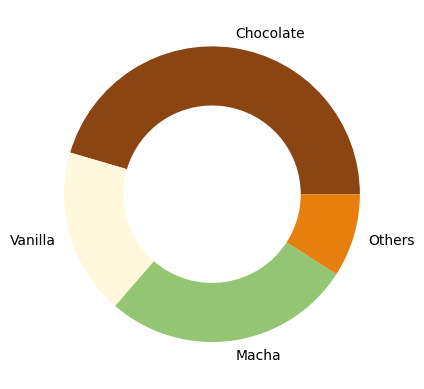

In [237]:
plt.pie(
    x=votes,
    labels=flavors,
    colors=colors,
    wedgeprops = {'width': 0.4} #donutplot
)
plt.show()

function hist() yang disediakan oleh library matplotlib.

Function ini menerima beberapa parameter seperti berikut.

* x: menampung data yang akan divisualisasikan.
* bins: menampung jumlah bins (sebanding dengan ukurannya) yang akan digunakan untuk membuat grafik histogram.

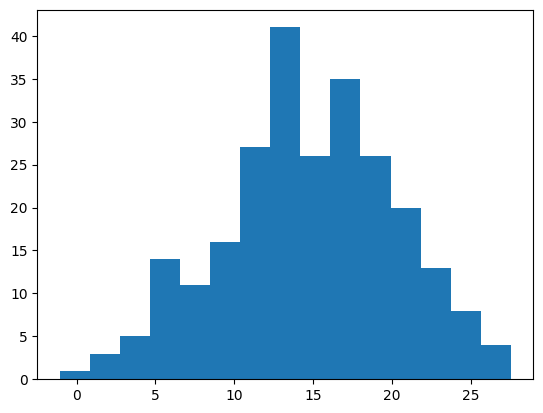

In [238]:
x = np.random.normal(15, 5, 250)

plt.hist(x=x, bins=15)
plt.show()

#Sample data random tersebut memiliki jumlah 250 titik data dengan nilai mean sebesar 15 dan standard deviation sebesar 5.

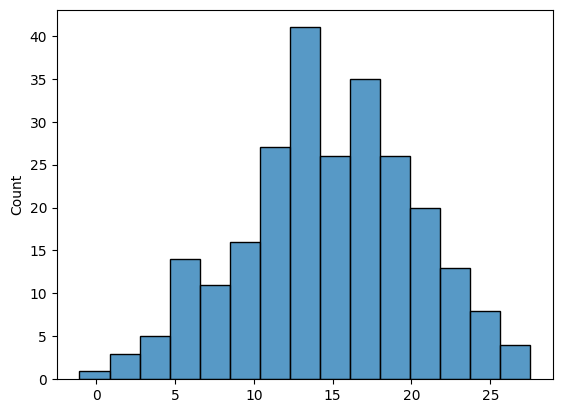

In [239]:
sns.histplot(x=x, bins=15)
plt.show()

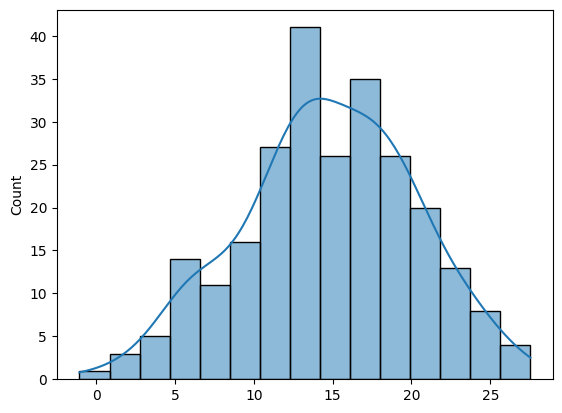

In [240]:
sns.histplot(x=x, bins=15, kde=True)
plt.show()

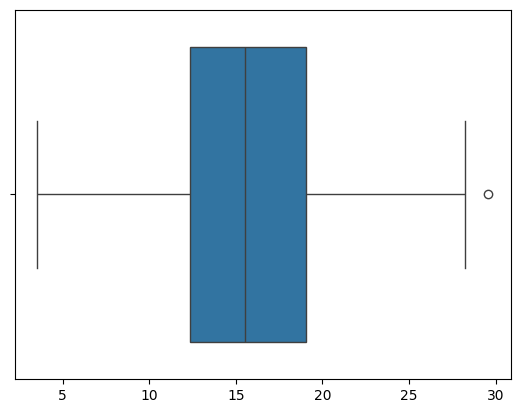

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x = np.random.normal(15, 5, 250)
sns.boxplot(x, orient='h')
plt.show()

**Bivariate dan Multivariate Visualization**

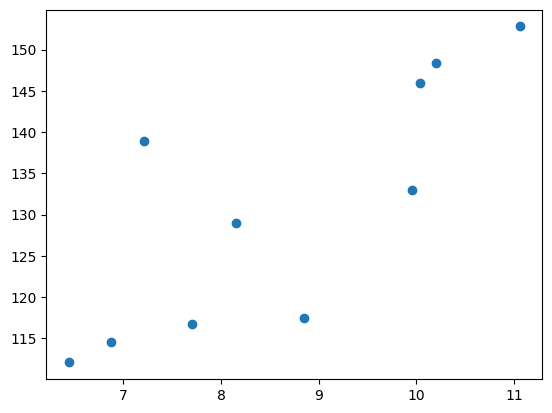

In [242]:
lemon_diameter = [6.44, 6.87, 7.7, 8.85, 8.15,
                  9.96, 7.21, 10.04, 10.2, 11.06]
lemon_weight = [112.05, 114.58, 116.71, 117.4, 128.93,
                132.93, 138.92, 145.98, 148.44, 152.81]

plt.scatter(x=lemon_diameter, y=lemon_weight)

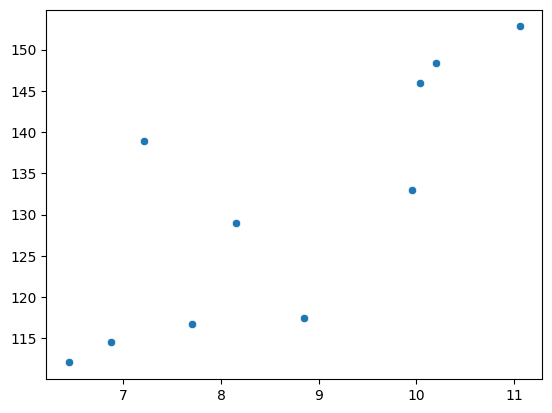

In [243]:
sns.scatterplot(x=lemon_diameter, y=lemon_weight)
plt.show()

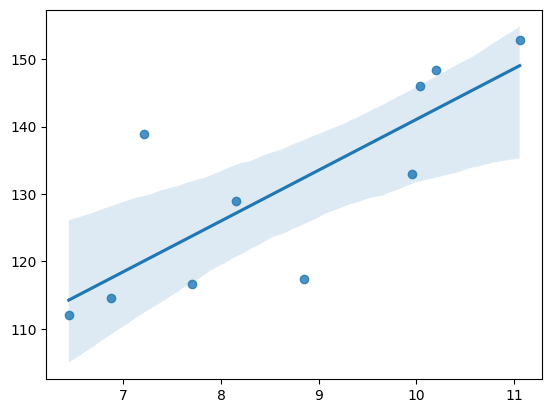

In [244]:
#fungsi yang memadukan scatter plot dengan regression function (metode statistik untuk memperkirakan korelasi)

sns.regplot(x=lemon_diameter, y=lemon_weight)
plt.show()

garis biru menunjukkan garis korelasi dari hasil regression sedangkan pita di sekitar garis tersebut menunjukkan confidence level dari hasil regression tersebut. Semakin kecil bentuk pita yang dihasilkan menandakan tingkat confidence level yang tinggi.

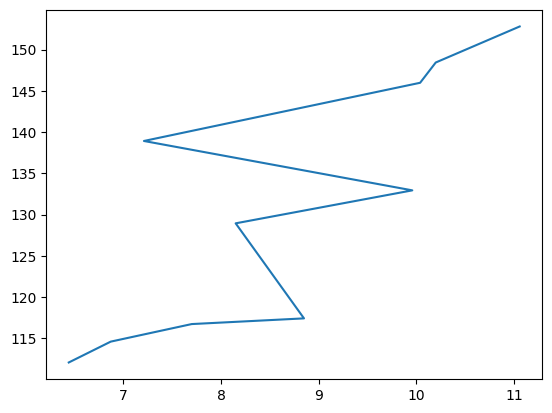

In [245]:
#line_chart
plt.plot(lemon_diameter, lemon_weight)
plt.show()

url = 'https://query1.finance.yahoo.com/v7/finance/download/BBCA.JK?period1=1644796800&period2=1676332800&interval=1d&events=history&includeAdjustedClose=true'
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], color='red')
plt.xlabel('Date',size=15)
plt.ylabel('Price',size=15)
plt.show()

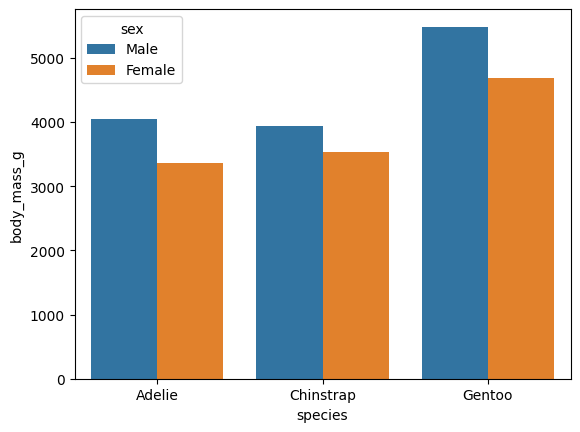

In [246]:
penguins = sns.load_dataset("penguins")

sns.barplot(data=penguins, x="species", y="body_mass_g", hue="sex", errorbar=None)
plt.show()

url = 'https://query1.finance.yahoo.com/v7/finance/download/BBCA.JK?period1=1644796800&period2=1676332800&interval=1d&events=history&includeAdjustedClose=true'
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])

df_boxplot = df[["Open", "High", "Low", "Close", "Adj Close"]]

sns.boxplot(data=df_boxplot, palette="rocket")
plt.ylabel('Price',size=15)
plt.show()

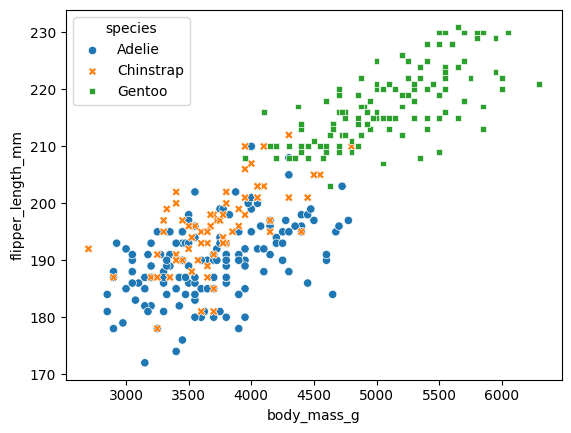

In [247]:
penguins = sns.load_dataset("penguins")

sns.scatterplot(data=penguins, x="body_mass_g", y="flipper_length_mm", hue="species", style="species")
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

url = 'https://query1.finance.yahoo.com/v7/finance/download/BBCA.JK?period1=1644796800&period2=1676332800&interval=1d&events=history&includeAdjustedClose=true'
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], label='Close', color='red')
plt.plot(df['Date'], df['Open'], label='Open', color='blue')
plt.title('BBCA Stock Price', size=20)
plt.xlabel('Date',size=15)
plt.ylabel('Price (IDR)',size=15)
plt.legend()
plt.show()

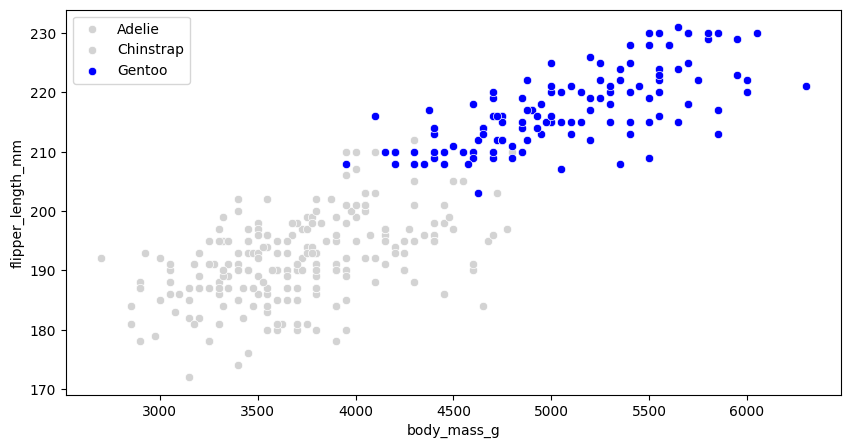

In [248]:
penguins_df = sns.load_dataset("penguins")

adelie_df = penguins_df[penguins_df.species == "Adelie"]
chinstrap_df = penguins_df[penguins_df.species == "Chinstrap"]
gentoo_df = penguins_df[penguins_df.species == "Gentoo"]

plt.figure(figsize=(10, 5))
sns.scatterplot(data=adelie_df, x="body_mass_g", y="flipper_length_mm", facecolor="lightgrey", label="Adelie")
sns.scatterplot(data=chinstrap_df, x="body_mass_g", y="flipper_length_mm", facecolor="lightgrey", label="Chinstrap")
sns.scatterplot(data=gentoo_df, x="body_mass_g", y="flipper_length_mm", facecolor="blue", label="Gentoo")
plt.legend()
plt.show()

In [250]:
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df.head()

<ipython-input-250-913cb68e019b>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({


,order_date,order_count,revenue
0,2021-01,109,119333
1,2021-02,93,95080
2,2021-03,117,131364
3,2021-04,99,97530
4,2021-05,84,85597


Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
Produk apa yang paling banyak dan paling sedikit terjual?
Bagaimana demografi pelanggan yang kita miliki?
Kapan terakhir pelanggan melakukan transaksi?
Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

<ipython-input-251-3bbcbf96bbd5>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({


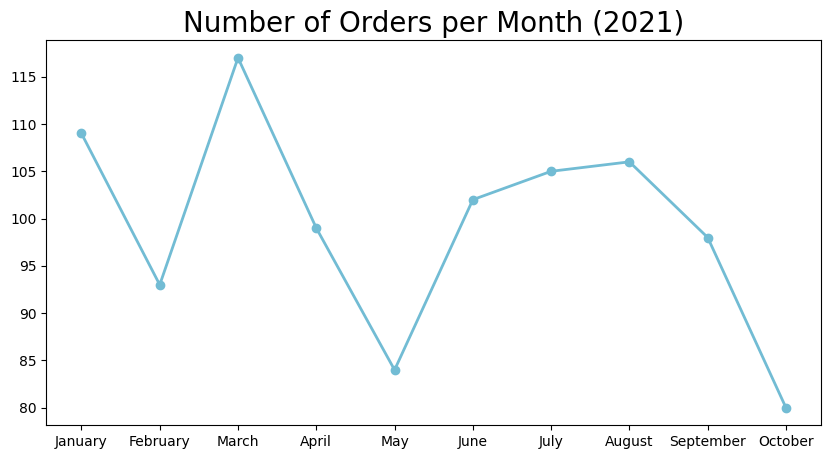

In [251]:
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #mengubah format order date menjadi nama bulan

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

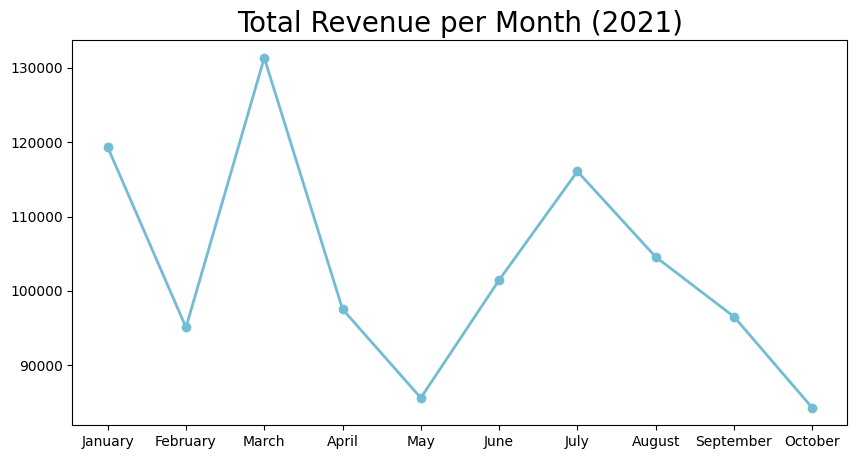

In [252]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [254]:
sum_orders_items_df = all_df.groupby(by="product_name").quantity_x.sum().sort_values(ascending=False).reset_index()
sum_orders_items_df.head(15)

,product_name,quantity_x
0,Denim,527
1,Joggers,334
2,Pleated,308
3,Casual Slim Fit,306
4,Shearling,302
5,Relaxed Leg,301
6,Trench Coat,299
7,Puffer,298
8,Bomber,297
9,Chambray,290


<ipython-input-259-75f33c8efc18>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity_x", y="product_name", data=sum_orders_items_df.head(5), palette=colors, ax=ax[0])
<ipython-input-259-75f33c8efc18>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity_x", y="product_name", data=sum_orders_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1])


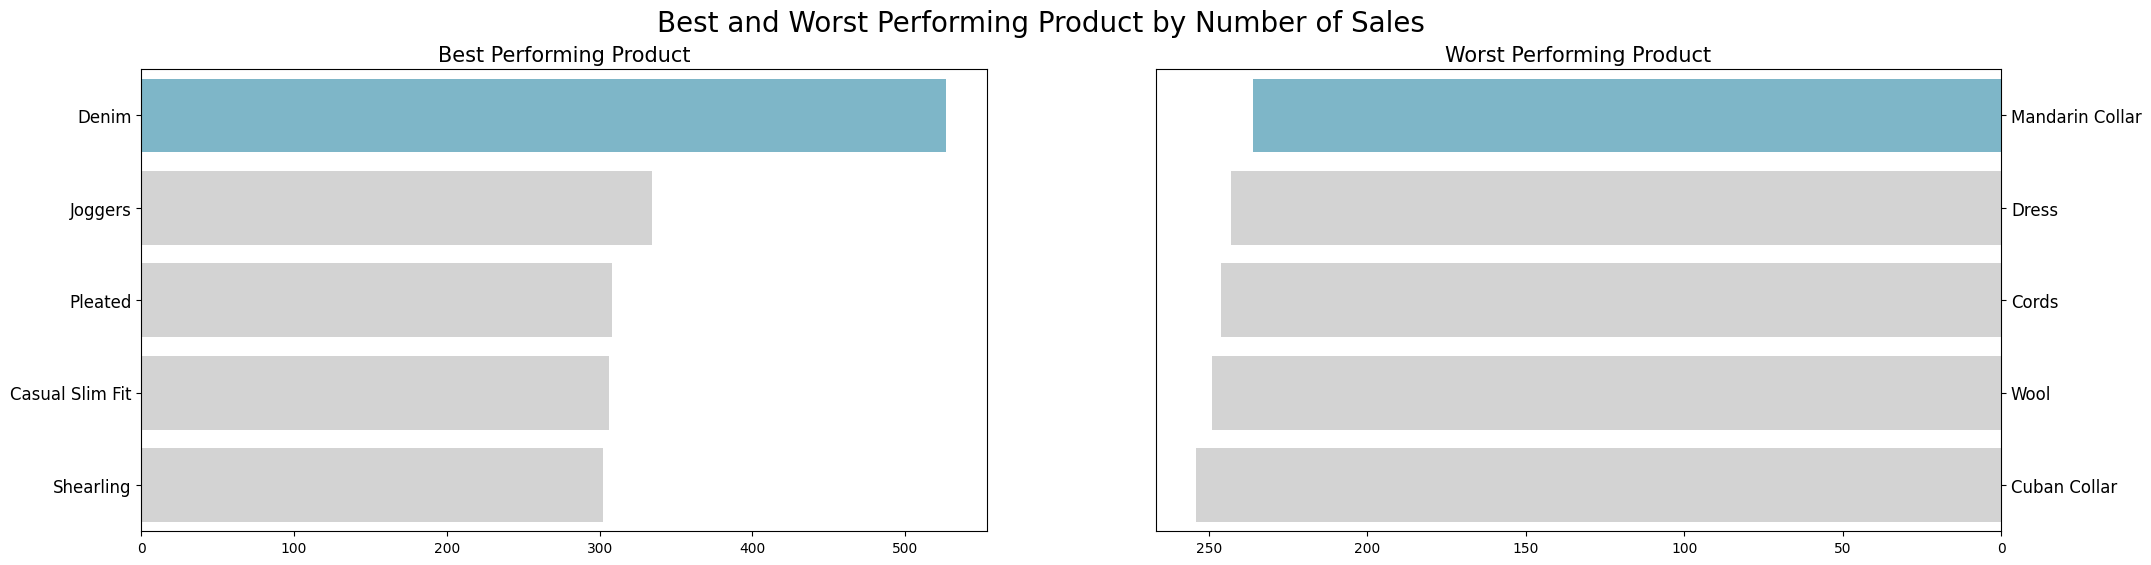

In [259]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity_x", y="product_name", data=sum_orders_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="quantity_x", y="product_name", data=sum_orders_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

<ipython-input-260-54e45a136d5f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-260-54e45a136d5f>:8: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


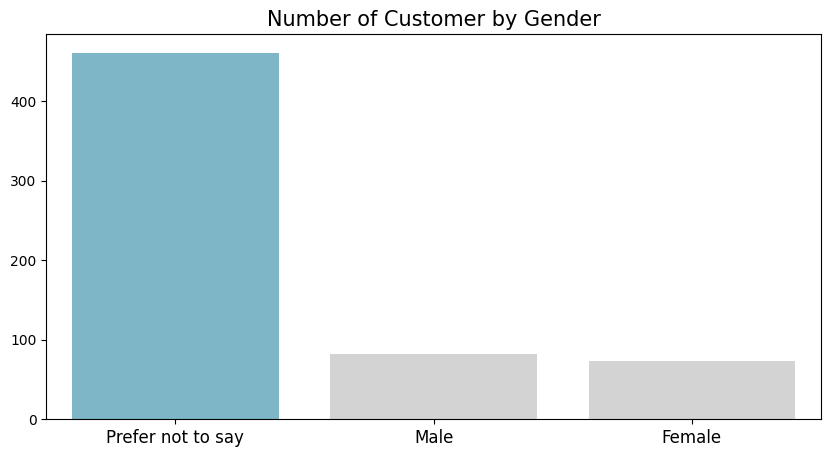

In [260]:
bygender_df = all_df.groupby(by="gender").customer_id.nunique().reset_index()
bygender_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count",
    x="gender",
    data=bygender_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by Gender", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)

<ipython-input-261-e80bef8f6cff>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-261-e80bef8f6cff>:10: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


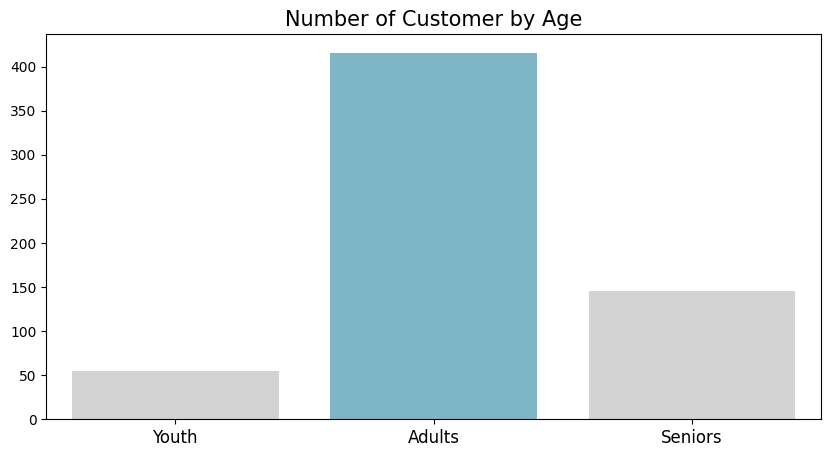

In [261]:
byage_df = all_df.groupby(by="age_group").customer_id.nunique().reset_index()
byage_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

byage_df['age_group'] = pd.Categorical(byage_df['age_group'], ["Youth", "Adults", "Seniors"])
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="customer_count",
    x="age_group",
    data=byage_df.sort_values(by="age_group", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by Age", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

<ipython-input-266-182ae9dd3f83>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


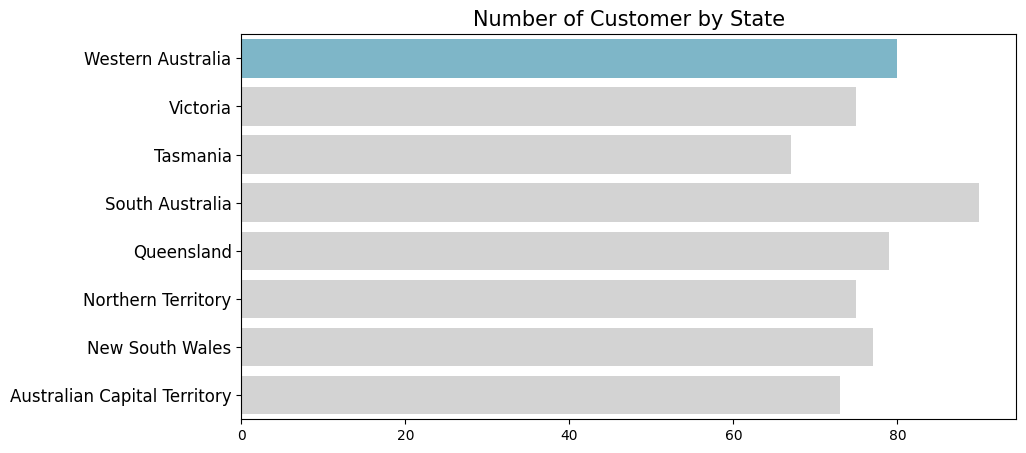

In [266]:
bystate_df = all_df.groupby(by="state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_count",
    y="state",
    data=bystate_df.sort_values(by="state", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by State", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

In [267]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_date": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "total_price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,1,3,1641,203
1,7,1,1017,156
2,10,1,270,229
3,11,1,382,149
4,12,1,1551,127


<ipython-input-268-af7d5f90629b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-268-af7d5f90629b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-268-af7d5f90629b>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(b

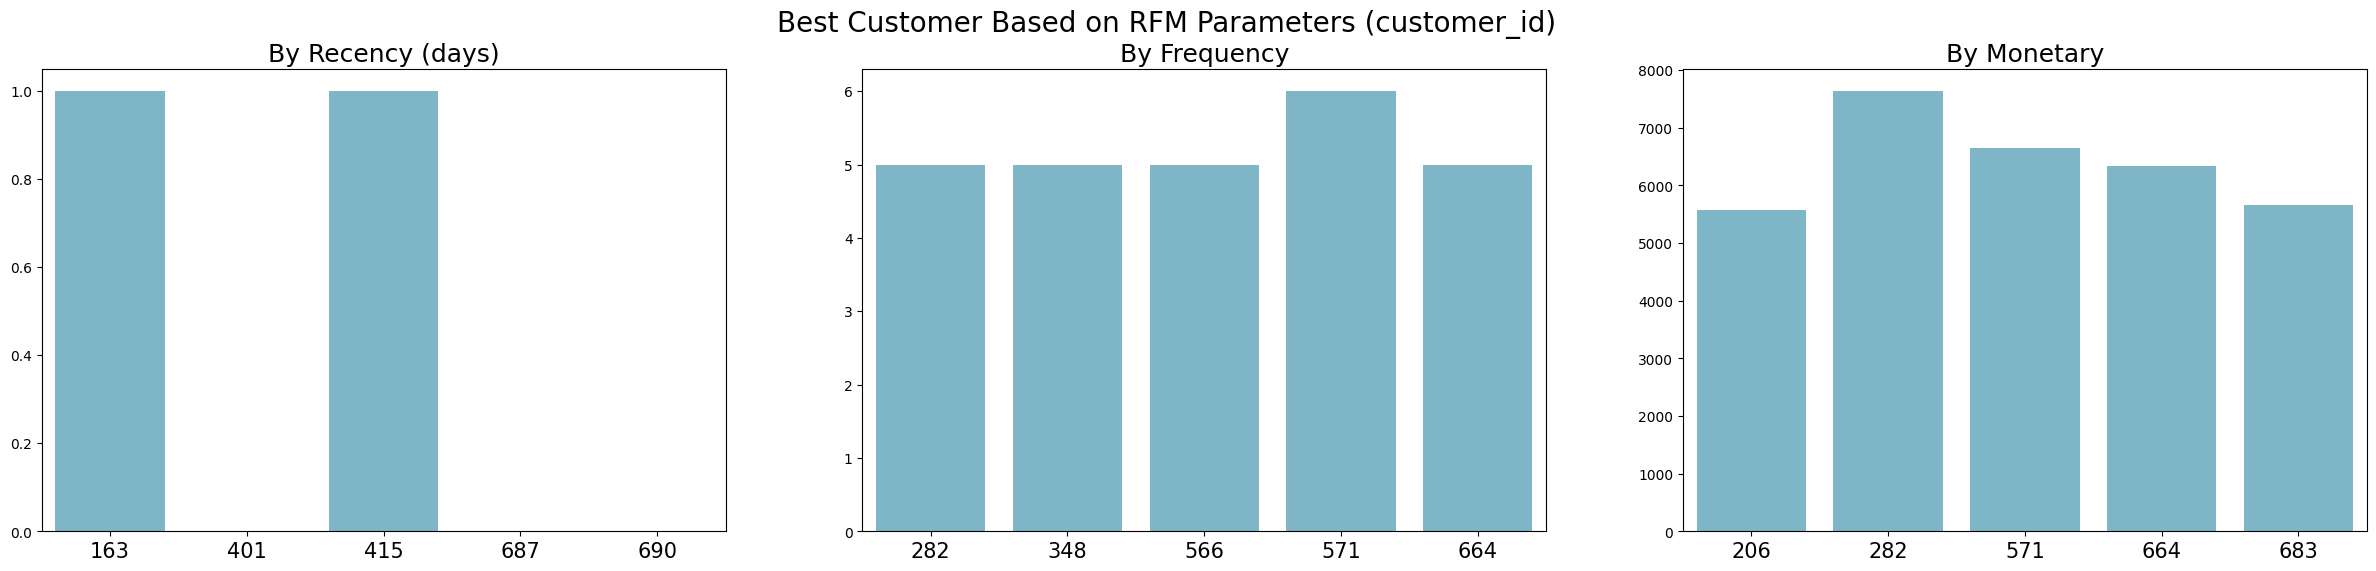

In [268]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()